# Performance Measures  I

In this notebook, we will implement **performance measures** for evaluating and comparing classifiers in machine learning. 

At the start, we will implement a function for computing *confusion matrices*.

It serves as a basis for computing the subsequent performance measures with a multi- or single-class focus.

Finally, we will compare the implemented performance measures using a simple exemplary classification task.

### **Table of Contents**
1. [Confusion Matrix](#confusion-matrix)
2. [Performances Measures with a Multi-class Focus](#multi-class)
3. [Performance Measures with a Single-class Focus](#single-class)
4. [Comparison of Performance Measures](#comparison)

In [5]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### **1. Confusion Matrix** <a class="anchor" id="confusion-matrix"></a>

The confusion matrix $\mathbf{C}_\mathcal{T}(h) \in \mathbb{N}^{|\mathcal{Y}| \times |\mathcal{Y}|}$ is a table or matrix that is commonly used to evaluate the performance of a
classifier $h: \mathcal{X} \rightarrow \mathcal{Y}$. It summarizes the predictions made by the classifier $h$ on a test set $\mathcal{T} \subset \mathcal{X} \times \mathcal{Y}$. The (unormalized) entries of the confusion matrix are defined as:

TODO

There exist other variants of a confusion matrix, where the entries of the confusion matrix are normalized row-wise, column-wise, or by the total sum of entries. We implement the function [`confusion_matrix`](../e2ml/evaluation/_performance_measures.py) in the [`e2ml.evaluation`](../e2ml/evaluation) subpackage.
Once, the implementation has been completed, we check its validity for simple examples. 

In [22]:
from e2ml.evaluation import confusion_matrix

# Check ranges of class labels.
y_1 = [0, -1, 2]
y_2 = [0, 1, 2]
check = False
try:
    confusion_matrix(y_true=y_1, y_pred=y_2)
except ValueError:
    check = True
assert check, 'There must be a ValueError because of invalid values.'
check = False
try:
    confusion_matrix(y_true=y_2, y_pred=y_1)
except ValueError:
    check = True
assert check, 'There must be a ValueError because of invalid values.'

# Check type of class labels.
y_1 = ["hello", "new", "test"]
y_2 = [0, 1, 2]
check = False
try:
    confusion_matrix(y_true=y_1, y_pred=y_2)
except ValueError:
    check = True
assert check, 'There must be a TypeError because of invalid value types.'
check = False
try:
    confusion_matrix(y_true=y_2, y_pred=y_1)
except ValueError:
    check = True
assert check, 'There must be a TypeError because of invalid value types.'

# Check unequal array lengths.
y_1 = [0, -1, 2, 3]
y_2 = [0, 1, 2]
check = False
try:
    confusion_matrix(y_true=y_1, y_pred=y_2)
except ValueError:
    check = True
assert check, 'There must be a ValueError because of unqueal array lengths.'
check = False
try:
    confusion_matrix(y_true=y_2, y_pred=y_1)
except ValueError:
    check = True
assert check, 'There must be a ValueError because of unqueal array lengths.'


# Test correct computation for various simple examples.
y_true = [1,1,0,0,1]
y_pred = [1,0,1,0,1]
C_true = np.array([[1,1],[1,2]])
C = confusion_matrix(y_true=y_true, y_pred=y_pred)
assert np.all(C == C_true), 'The confusion matrix is not correct.'

y_true = [1,1,0,1]
y_pred = [1,0,1,0]
C_true = np.array([[0,1],[2,1]])
C = confusion_matrix(y_true=y_true, y_pred=y_pred)
assert np.all(C == C_true), 'The confusion matrix is not correct.'

### **2. Performance Measures with a Multi-class Focus** <a class="anchor" id="multi-class"></a>

The accuracy $\mathrm{ACC}_\mathcal{T}(h) \in [0, 1]$ of a classifier $h$ on a test set $\mathcal{T}$ is one of the most know performance measures and can be computed  as the complement of the empirical risk $R_\mathcal{T}(h)$ or using the confusion matrix $\mathbf{C}_{\mathcal{T}}(h)$ as follows:

TODO

We implement the function [`accuracy`](../e2ml/evaluation/_performance_measures.py) in the [`e2ml.evaluation`](../e2ml/evaluation) subpackage.
Once, the implementation has been completed, we check its validity for simple examples. 

In [29]:
from e2ml.evaluation import accuracy

# Check unequal array lengths.
y_1 = [0, -1, 2, 3]
y_2 = [0, 1, 2]
check = False
try:
    print(accuracy(y_true=y_1, y_pred=y_2))
except ValueError:
    check = True
assert check, 'There must be a ValueError because of unqueal array lengths.'
check = False
try:
    accuracy(y_true=y_2, y_pred=y_1)
except ValueError:
    check = True
assert check, 'There must be a ValueError because of unqueal array lengths.'


# Test correct computation for various simple examples.
y_true = [1,1,0,0,1]
y_pred = [1,0,1,0,1]
acc_true = 0.6
acc = accuracy(y_true=y_true, y_pred=y_pred)
assert acc == acc_true, 'The accuracy is not correct.'

y_true = [1,1,0,0]
y_pred = [1,0,1,0]
acc_true = 0.5
acc = accuracy(y_true=y_true, y_pred=y_pred)
assert acc == acc_true, 'The accuracy is not correct.'

#### **Question:**
2. (a) What are limitations of the accuracy as performance measure?

   TODO

Cohen’s $\kappa$ represents a more realistic estimate of classifier effectiveness, which is the proportion of labels that the classifier gets right over and above chance agreement. We can compute this performance measure according to:

TODO

We implement the function [`cohen_kappa_score`](../e2ml/evaluation/_performance_measures.py) in the [`e2ml.evaluation`](../e2ml/evaluation) subpackage. Once, the implementation has been completed, we check its validity for simple examples. 

In [38]:
from e2ml.evaluation import cohen_kappa

# Test correct computation for various simple examples.
y_true = [1,1,0,0,1]
y_pred = [1,0,1,0,1]
kappa_true = 0.16
kappa = cohen_kappa(y_true=y_true, y_pred=y_pred)
assert np.isclose(kappa, kappa_true, atol=0.01), f'The Cohen kappa is not correct. {kappa} != {kappa_true}'

y_true = [1,1,0,0]
y_pred = [1,0,1,0]
kappa_true = 0.0
kappa = cohen_kappa(y_true=y_true, y_pred=y_pred)
assert kappa == kappa_true, f'The Cohen kappa is not correct. {kappa} != {kappa_true}'

### **3. Performance Measures with a Single-class Focus** <a class="anchor" id="single-class"></a>

The F measure combines precision and recall in a score by computing the weighted harmonic mean of both. For any $\alpha \in \mathbb{R}_{>0}$, the F measure can be given as:

TODO

The F1 measure or balance F measure weights the recall and precision of the classifier evenly via $\alpha=1$. The macro F1 measure is an extension toward multi-class problems. Its idea is to compute the F1 score for each class and then taking the arithmetic mean of these scores.

We implement the function [`macro_f1_measure`](../e2ml/evaluation/_performance_metrics.py) in the [`e2ml.evaluation`](../e2ml/evaluation) subpackage. Once, the implementation has been completed, we check its validity for simple examples. 

In [42]:
from e2ml.evaluation import macro_f1_measure

# Test correct computation for various simple examples.
y_true = [1,1,0,0,1]
y_pred = [1,0,1,0,1]
f1_true = 0.58
f1 = macro_f1_measure(y_true=y_true, y_pred=y_pred)
assert np.isclose(f1, f1_true, atol=0.01), f'The macro F1 measure is not correct: {f1} != {f1_true}'

y_true = [1,1,0,0]
y_pred = [1,0,1,0]
f1_true = 0.5
f1 = macro_f1_measure(y_true=y_true, y_pred=y_pred)
assert f1 == f1_true, f'The macro F1 measure is not correct. {f1} != {f1_true}'

### **4. Comparison of Performance Measures** <a class="anchor" id="comparison"></a>
In the following, we perform an exemplary evaluation study to compare the performance measures accuracy, Cohen's kappa, and macro F1. Therefore, we fit a logistic regression model on a synthetic data set and compute the corresponding measures.

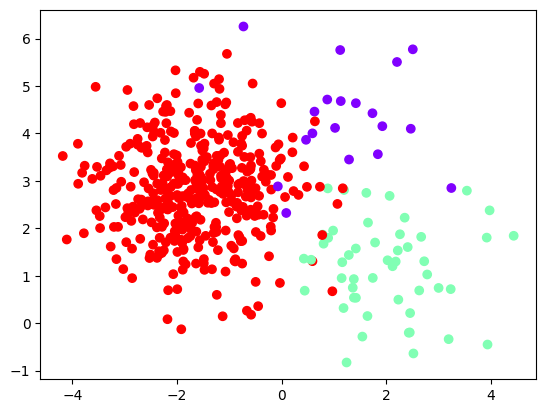

train accuracy: 0.97
train Cohen kappa: 0.89
train macro F1 measure: 0.91

test accuracy: 0.99
test Cohen kappa: 0.94
test macro F1 measure: 0.97



In [54]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression

# Generate classification dataset.
X, y = make_blobs(n_samples=[20, 50, 400], random_state=0)

# Visualize the dataset.
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow')
plt.show()

# Split the dataset into 80% training data and 20% test data.
train = np.random.choice([True, False], size=len(y), p=[0.8, 0.2])
test = ~train

# Fit a logistic regression model on the training data.
lr = LogisticRegression(max_iter=2000, random_state=0) # <- SOLUTION
lr.fit(X[train], y[train]) # <- SOLUTION

# Evaluate and print the three performance measures on the training and test set.
for name, data in zip(['train', 'test'], [train, test]):
    y_true = y[data]
    y_pred = lr.predict(X[data])
    print(f'{name} accuracy: {accuracy(y_true, y_pred):.2f}')
    print(f'{name} Cohen kappa: {cohen_kappa(y_true, y_pred):.2f}')
    print(f'{name} macro F1 measure: {macro_f1_measure(y_true, y_pred):.2f}')
    print()

In [55]:
from ipywidgets import interactive, FloatSlider, IntSlider, Dropdown, Button


def intr_comparison(random_state):
    # Generate classification dataset.
    X, y = make_blobs(n_samples=[20, 50, 400], random_state=0)

    # Split the dataset into 80% training data and 20% test data.
    train = np.random.choice([True, False], size=len(y), p=[0.8, 0.2])
    test = ~train

    # Fit a logistic regression model on the training data.
    lr = LogisticRegression(max_iter=2000, random_state=0)  # <- SOLUTION
    lr.fit(X[train], y[train])  # <- SOLUTION

    sub_title = ""

    # Evaluate and add to subtitle the three performance measures on the training and test set.
    for name, data in zip(["train", "test"], [train, test]):
        y_true = y[data]
        y_pred = lr.predict(X[data])
        sub_title += f"{name} accuracy: {accuracy(y_true, y_pred):.2f}\n"
        sub_title += f"{name} Cohen kappa: {cohen_kappa(y_true, y_pred):.2f}\n"
        sub_title += (
            f"{name} macro F1 measure: {macro_f1_measure(y_true, y_pred):.2f}\n\n"
        )

    # Visualize the dataset.
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="rainbow")
    plt.title(f"Random state: {random_state}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.text(
        0.95,
        0.05,
        sub_title,
        horizontalalignment="right",
        verticalalignment="bottom",
        transform=plt.gca().transAxes,
    )

    # show lr
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100)
    )
    Z = lr.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    
    plt.contour(xx, yy, Z, levels=[0.5], colors="black")
    plt.legend()
    plt.show()


interactive(intr_comparison, random_state=IntSlider(min=0, max=100, step=1, value=0))

interactive(children=(IntSlider(value=0, description='random_state'), Output()), _dom_classes=('widget-interac…